In [3]:
library(NELSI)
library(phangorn)

Loading required package: ape
Loading required package: geiger


In [4]:
#prior_trees <- read.nexus('m_tub_argentina_samples_priors.trees')
prior_trees <- read.nexus('empty_dat.trees')

[1] 99.34445


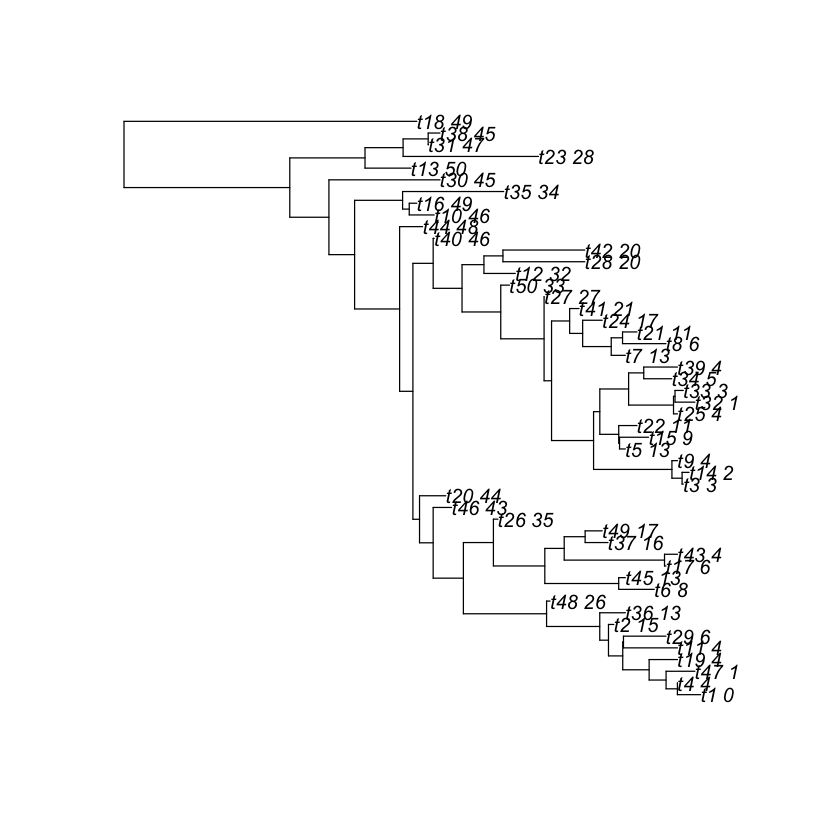

In [5]:
plot(prior_trees[[100]])
print(max(allnode.times(prior_trees[[150]])))

In [7]:
#Sample 10 trees 
trees_sim <- prior_trees[sample(1:length(prior_trees), 10)]
write.tree(trees_sim, 'chronograms_sim_3.trees')

In [8]:
sim_gtrg <- function(tree, slen){
    rates <- phangorn:::discrete.gamma(alpha = 7, k = 4)
    slen = slen/4
    print(rates)
    seq1 <- simSeq(tree, l=slen, Q = c(0.3, 0.9, 0.18, 0.28, 0.33, 1), bf = c(0.19, 0.35, 0.31, 0.153), rate = rates[1])
    seq2 <- simSeq(tree, l=slen, Q = c(0.3, 0.9, 0.18, 0.28, 0.33, 1), bf = c(0.19, 0.35, 0.31, 0.153), rate = rates[2])
    seq3 <- simSeq(tree, l=slen, Q = c(0.3, 0.9, 0.18, 0.28, 0.33, 1), bf = c(0.19, 0.35, 0.31, 0.153), rate = rates[3])
    seq4 <- simSeq(tree, l=slen, Q = c(0.3, 0.9, 0.18, 0.28, 0.33, 1), bf = c(0.19, 0.35, 0.31, 0.153), rate = rates[4])
    seqs <- as.DNAbin(c(seq1, seq2, seq3, seq4))
    return(seqs)
}

In [9]:
# Strict clocks
for(tr in 1:length(trees_sim)){
    sc_rates <- simulate.clock(trees_sim[[tr]], params = list(rate = 1e-3, noise = 0))
    sc_data <- sim_gtrg(sc_rates[[1]], slen = 2000)
    write.dna(sc_data, file = paste0('sims_r3/SC_', tr, '.fasta'), format = 'fasta', nbcol = -1, colsep= '')
    
    acl_rates <- simulate.autocor.thorne(trees_sim[[tr]], params = list(initial.rate = 1e-3, v = 0.005))
    acl_data <- sim_gtrg(acl_rates[[1]], slen = 2000)
    write.dna(acl_data, file = paste0('sims_r3/ACL_', tr, '.fasta'), format = 'fasta', nbcol = -1, colsep= '')
    
    
    igr_rates <- simulate.uncor.lnorm(trees_sim[[tr]], params = list(mean.log = log(1e-3), sd.log = 0.1))
    igr_data <- sim_gtrg(igr_rates[[1]], slen = 2000)
    write.dna(igr_data, file = paste0('sims_r3/UCL_', tr, '.fasta'), format = 'fasta', nbcol = -1, colsep= '')
    
    
}


[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.0789537 1.5122788
[1] 0.5685851 0.8401824 1.078953

In [26]:
sc_rates[[1]]$edge.length

[1] 4.550402e-06 4.451880e-06 1.976942e-06 4.965602e-07 2.478378e-06
 [6] 2.437378e-06 2.333938e-06 3.430985e-06 2.464482e-06 9.817934e-08
[11] 2.054079e-06 5.005482e-08 1.079503e-06 1.271503e-06 1.796557e-06
[16] 1.026751e-07 1.808763e-06 1.272197e-06 9.391975e-07 6.920480e-07
[21] 3.072913e-06 2.705913e-06 4.768633e-08 1.566185e-08 2.581842e-07
[26] 2.403675e-07 1.393071e-06 1.443844e-06 9.523073e-07 9.585370e-07
[31] 4.245370e-07 4.090792e-07 2.400897e-06 4.019389e-07 7.269389e-07
[36] 2.175905e-07 1.906995e-07 1.961546e-06 4.042366e-07 1.765310e-06
[41] 1.432310e-06 2.610246e-06 2.610283e-06 1.824315e-06 4.176976e-07
[46] 4.515411e-07 4.559145e-07 4.609990e-07 2.859990e-07 1.091913e-06
[51] 9.014546e-07 2.169152e-06 1.704833e-07 5.988773e-07 2.118185e-07
[56] 2.494950e-06 3.890142e-07 1.938936e-06 1.311072e-07 2.182828e-06
[61] 1.232828e-06 1.866007e-06 7.237609e-07 2.737609e-07 2.615016e-07
[66] 8.693894e-07 2.141755e-06 1.624755e-06 9.756495e-07 1.543495e-06
[71] 4.217414e-08 3.675767e-07 6.852498e-07 6.734939e-07 1.323494e-06
[76] 6.156514e-07 9.600924e-07 7.680924e-07 1.083391e-06 1.117930e-06
[81] 9.259296e-07 1.184997e-06 7.958632e-07 6.317769e-07 1.195845e-06
[86] 2.104815e-06 2.404815e-06 3.650660e-06 4.574437e-06 2.899285e-06
[91] 1.258125e-07 3.534845e-07 1.141718e-06 8.917180e-07 1.429053e-06
[96] 4.491498e-07 8.241498e-07 1.587015e-06